Dataset loaded successfully.

--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Flight No.       187 non-null    int64  
 1   FlightNumber     187 non-null    int64  
 2   Date             187 non-null    object 
 3   Time             187 non-null    object 
 4   Launchoutcome    186 non-null    object 
 5   Outcome          186 non-null    object 
 6   BoosterVersion   187 non-null    object 
 7   Version Booster  187 non-null    object 
 8   Launch site      187 non-null    object 
 9   LaunchSite       187 non-null    object 
 10  Longitude        187 non-null    float64
 11  Latitude         187 non-null    float64
 12  Payload          187 non-null    object 
 13  PayloadMass      162 non-null    float64
 14  Orbit            186 non-null    object 
 15  Customer         183 non-null    object 
 16  Serial

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Random Forest Accuracy: 0.9737
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.97      1.00      0.99        37

    accuracy                           0.97        38
   macro avg       0.49      0.50      0.49        38
weighted avg       0.95      0.97      0.96        38


Training Support Vector Machine...
Support Vector Machine Accuracy: 0.9474
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.97      0.97      0.97        37

    accuracy                           0.95        38
   macro avg       0.49      0.49      0.49        38
weighted avg       0.95      0.95      0.95        38


Training Gradient Boosting...
Gradient Boosting Accuracy: 1.0000
Gradient Boosting Classification Report:
              precision    recall  f1-score   sup

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

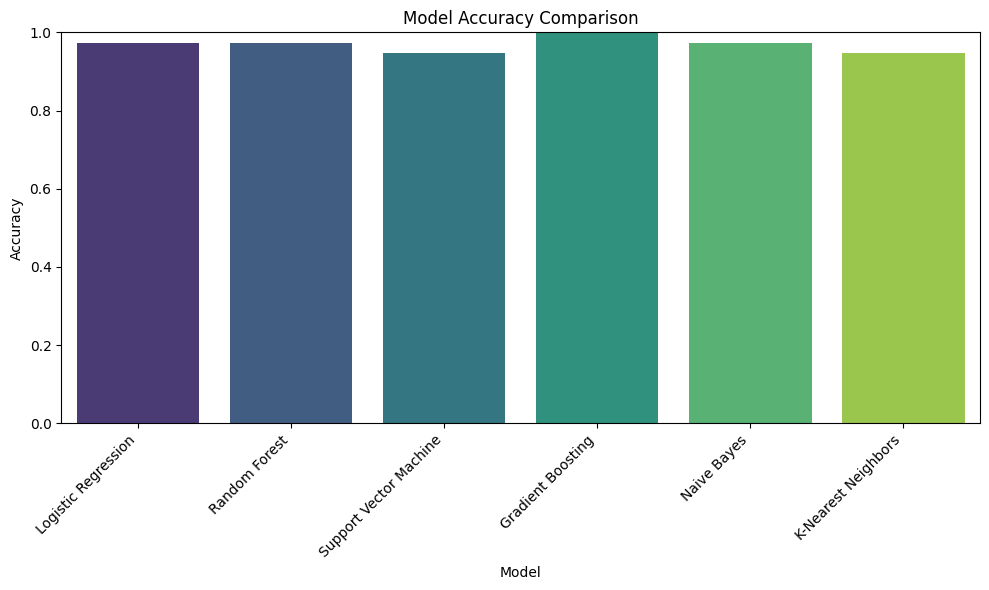

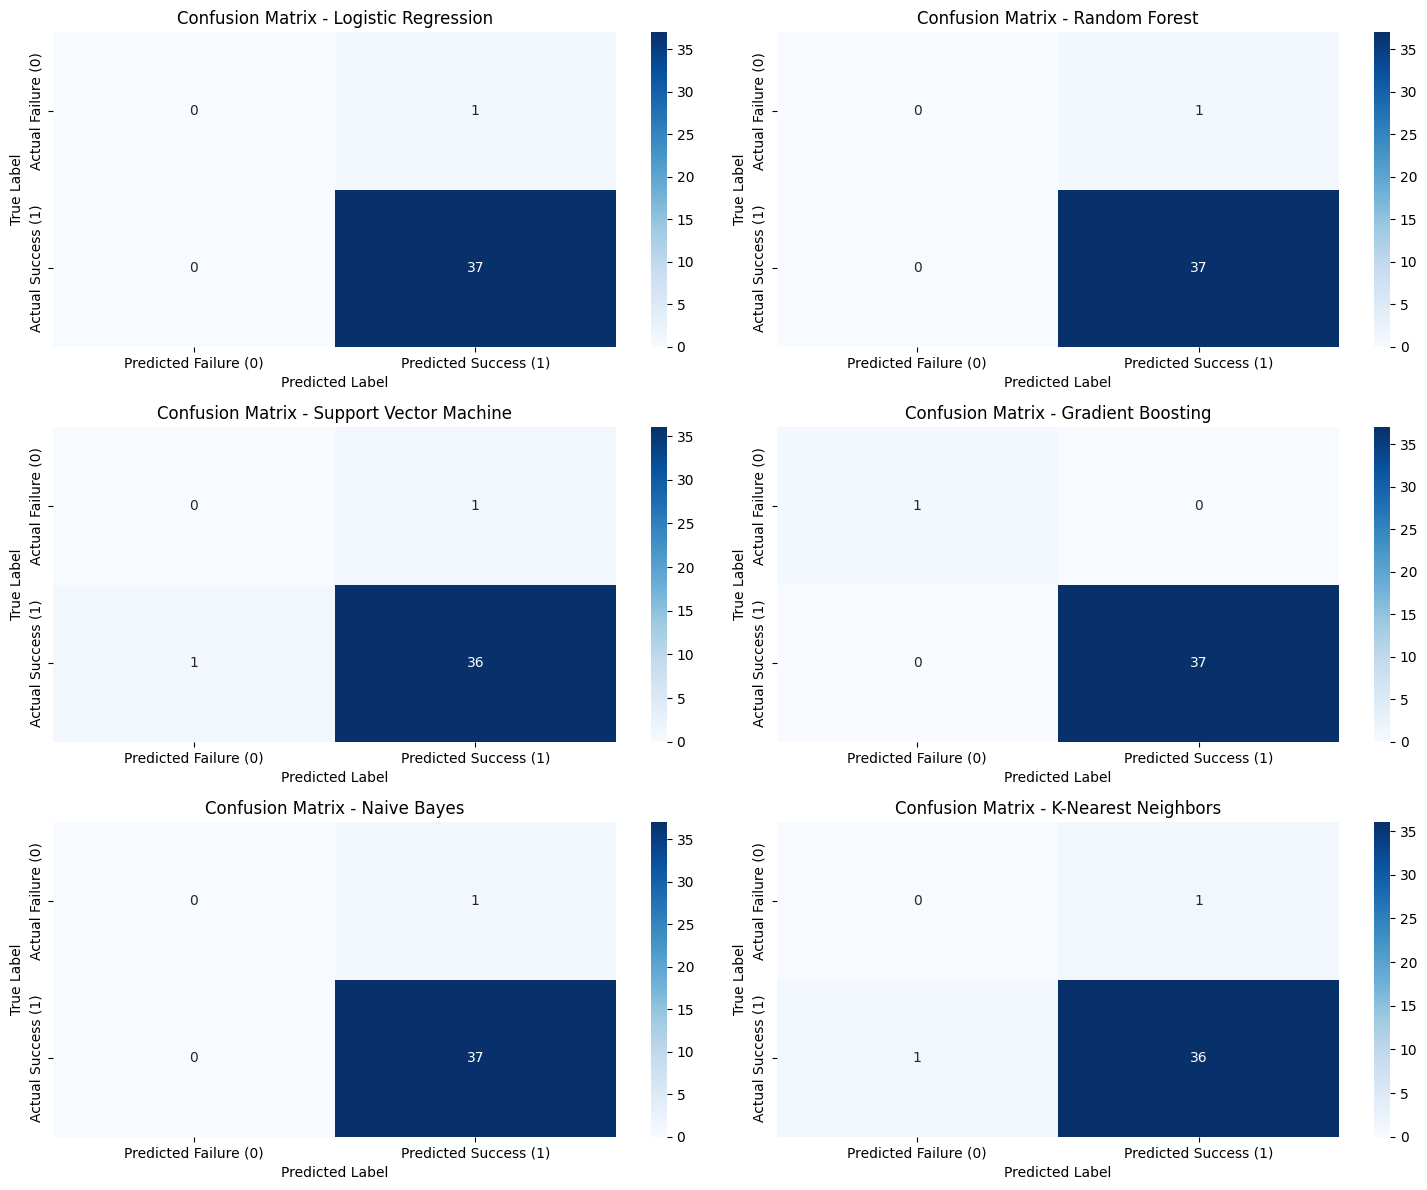


--- Summary of Model Accuracies ---
Logistic Regression: 0.9737
Random Forest: 0.9737
Support Vector Machine: 0.9474
Gradient Boosting: 1.0000
Naive Bayes: 0.9737
K-Nearest Neighbors: 0.9474


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import io # Required for reading content fetched from file_content_fetcher

# --- 1. Data Loading ---
# In Google Colab, you would typically upload the file or mount Google Drive.
# For this environment, we're simulating loading it from the provided content.
# Assuming 'spacex_comprehensive_launches.csv' is available in the environment.
# If running in Colab directly, you would use:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv(io.BytesIO(uploaded['spacex_comprehensive_launches.csv']))

# Since the file content is provided via content_fetcher, we simulate reading it.
# In a real Colab notebook, you'd replace this with pd.read_csv('spacex_comprehensive_launches.csv')
try:
    df = pd.read_csv('spacex_comprehensive_launches.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'spacex_comprehensive_launches.csv' not found.")
    print("Please ensure the file is uploaded to your Colab environment or the correct path is provided.")
    exit() # Exit if the file isn't found

# --- 2. Data Preprocessing ---
print("\n--- Initial Data Info ---")
df.info()
print("\nMissing values before handling:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Define columns to drop that are irrelevant as features
columns_to_drop = ['FlightNumber', 'Date', 'Time', 'Serial', 'BoosterVersion']
# Keep 'Outcome' as it will be used to create the 'Class' target variable
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Handle missing 'PayloadMass (kg)' by filling with the median
if 'PayloadMass (kg)' in df.columns:
    df['PayloadMass (kg)'] = df['PayloadMass (kg)'].fillna(df['PayloadMass (kg)'].median())
    print(f"\nFilled missing 'PayloadMass (kg)' with median: {df['PayloadMass (kg)'].median():.2f}")

# Handle missing 'LandingPad' by treating NaN as a new category 'Unknown_LandingPad'
if 'LandingPad' in df.columns:
    df['LandingPad'] = df['LandingPad'].fillna('Unknown_LandingPad')
    print("Filled missing 'LandingPad' with 'Unknown_LandingPad'.")

# Convert boolean columns to integer (0 or 1) if they are not already numeric
for col in ['GridFins', 'Reused', 'Legs']:
    if col in df.columns and df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

# --- Create the 'Class' target variable from 'Outcome' ---
# Assuming 'Outcome' column exists and contains strings like 'True ASDS', 'False RTLS', etc.
if 'Outcome' in df.columns:
    # 'Class' will be 1 for successful outcomes (containing 'True') and 0 for failures (containing 'False')
    df['Class'] = df['Outcome'].apply(lambda x: 1 if 'True' in str(x) else 0)
    # Now that 'Class' is created, 'Outcome' is no longer needed as a feature
    df = df.drop('Outcome', axis=1)
    print("\nCreated 'Class' target variable from 'Outcome' column.")
else:
    print("\nWARNING: 'Outcome' column not found. Please ensure your dataset has a column indicating launch success/failure.")
    print("Models might not train correctly without a 'Class' target variable.")
    # Exit or handle gracefully if 'Class' cannot be formed
    # For now, we'll assume 'Class' would exist from 'Outcome' for subsequent steps.

print("\nMissing values after initial handling:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Identify categorical features for one-hot encoding
# Automatically detect object (string) columns that are not the target variable
all_object_cols = df.select_dtypes(include='object').columns.tolist()

# Ensure 'Class' (if it somehow became an object type, though it should be int/float) is not included in categorical features
if 'Class' in all_object_cols:
    all_object_cols.remove('Class')

# Ensure LaunchSite, Orbit, LandingPad are always included if they exist and are still object types
categorical_features = list(set(['LaunchSite', 'Orbit', 'LandingPad'] + all_object_cols))
# Remove any columns from categorical_features that might have been dropped or don't exist
categorical_features = [f for f in categorical_features if f in df.columns]

print(f"\nIdentified categorical features for one-hot encoding: {categorical_features}")

# Apply one-hot encoding to categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
print(f"\nShape after one-hot encoding: {df_encoded.shape}")

# Define features (X) and target (y)
# Check if 'Class' exists in df_encoded after all operations
if 'Class' not in df_encoded.columns:
    print("\nERROR: 'Class' column is not found in the DataFrame after preprocessing.")
    print("Please check your dataset and preprocessing steps to ensure the target variable is correctly defined.")
    exit() # Exit if target variable is not found

X = df_encoded.drop('Class', axis=1) # 'Class' is assumed to be the target variable
y = df_encoded['Class']

# Ensure X and y have consistent indices (important if any rows were dropped due to NaNs, though handled above)
X, y = X.align(y, join='inner', axis=0)

# --- REVISED: Comprehensive Final handling for any remaining NaNs in X ---
# This addresses the ValueError: Input X contains NaN more aggressively.
print("\n--- Final NaN Check and Handling in Features (X) ---")
initial_nan_count = X.isnull().sum().sum()
if initial_nan_count > 0:
    print(f"Initial NaNs found in X before final filling: {initial_nan_count}")

    # Fill numerical NaNs with the median (this handles cases where specific columns might still have NaNs)
    for col in X.select_dtypes(include=np.number).columns:
        if X[col].isnull().any():
            median_val = X[col].median()
            X[col] = X[col].fillna(median_val)
            # print(f"  Filled numerical NaNs in '{col}' with median: {median_val:.2f}")

    # Fill any remaining NaNs with 0. This acts as a robust final safeguard for all column types.
    X = X.fillna(0)
    print("  All remaining NaNs in X (if any) have been filled with 0.")

if X.isnull().sum().sum() == 0:
    print("All NaNs in features (X) have been successfully handled.")
else:
    print("CRITICAL ERROR: NaNs still present in features (X) after final handling. Please inspect data.")
    print(X.isnull().sum()[X.isnull().sum() > 0]) # Print remaining NaNs if any
    exit() # Exit if NaNs persist, as models won't run


# Final check for non-numeric columns in X before splitting/scaling (existing check, kept for robustness)
non_numeric_cols_in_X = X.select_dtypes(include=['object']).columns
if len(non_numeric_cols_in_X) > 0:
    print(f"\nWARNING: Non-numeric columns still present in features (X) before training: {non_numeric_cols_in_X.tolist()}")
    print("Dropping these columns to proceed with model training.")
    X = X.drop(columns=non_numeric_cols_in_X)
    # After dropping, check for NaNs one more time, though unlikely for numerical data
    if X.isnull().sum().sum() > 0:
        print("WARNING: NaNs reappeared after dropping non-numeric columns. Filling with 0 as a last resort.")
        X = X.fillna(0)


# --- 3. Data Splitting ---
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Target distribution in training set:\n{y_train.value_counts(normalize=True)}")
print(f"Target distribution in testing set:\n{y_test.value_counts(normalize=True)}")


# --- 4. Feature Scaling ---
# Identify numerical columns for scaling
# Exclude one-hot encoded columns and binary flags which are already 0/1 and don't need scaling
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64'] and col not in ['GridFins', 'Reused', 'Legs']]

scaler = StandardScaler()
# Ensure numerical_cols exist in X_train and X_test before scaling
numerical_cols_present_in_train = [col for col in numerical_cols if col in X_train.columns]
numerical_cols_present_in_test = [col for col in numerical_cols if col in X_test.columns]


if numerical_cols_present_in_train:
    X_train[numerical_cols_present_in_train] = scaler.fit_transform(X_train[numerical_cols_present_in_train])
    X_test[numerical_cols_present_in_test] = scaler.transform(X_test[numerical_cols_present_in_test])
    print("\nNumerical features scaled.")
else:
    print("\nNo numerical columns identified for scaling or numerical columns not present in the split datasets.")


# --- 5. Model Training and Evaluation ---
models = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear'),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42, probability=True), # probability=True for consistent API, though not used for metrics here
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

accuracies = {}
confusion_matrices = {}
classification_reports = {}

print("\n--- Model Training and Evaluation ---")
for name, model in models.items():
    print(f"\nTraining {name}...")
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)

        accuracies[name] = acc
        confusion_matrices[name] = cm
        classification_reports[name] = report

        print(f"{name} Accuracy: {acc:.4f}")
        print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")
    except Exception as e:
        print(f"Error training {name}: {e}")
        print("Skipping this model due to error.")


# --- 6. Visualizations ---

if accuracies: # Only plot if there are models that successfully trained
    # Bar chart for accuracies
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.ylim(0.0, 1.0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Confusion matrices for each model
    plt.figure(figsize=(15, 12))
    successful_models_count = len(confusion_matrices)
    # Dynamically adjust subplot grid to accommodate successful models
    rows = int(np.ceil(successful_models_count / 2))
    cols = 2 if successful_models_count > 1 else 1

    for i, (name, cm) in enumerate(confusion_matrices.items()):
        plt.subplot(rows, cols, i + 1)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Predicted Failure (0)', 'Predicted Success (1)'],
                    yticklabels=['Actual Failure (0)', 'Actual Success (1)'])
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    print("\n--- Summary of Model Accuracies ---")
    for name, acc in accuracies.items():
        print(f"{name}: {acc:.4f}")
else:
    print("\nNo models were successfully trained to generate visualizations.")
